In [21]:
%matplotlib inline
import os
from subprocess import check_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix


np.random.seed(42)

data = pd.read_csv('flightData.csv')
data.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,Distance,Dest,CancellationCode,Cancelled,WeatherDelay
0,0,1,3,4,2003.0,1955,WN,335,810,TPA,N,0,NaN
1,1,1,3,4,754.0,735,WN,3231,810,TPA,N,0,NaN
2,2,1,3,4,628.0,620,WN,448,515,BWI,N,0,NaN
3,3,1,3,4,1829.0,1755,WN,3920,515,BWI,N,0,0.0
4,4,1,3,4,1940.0,1915,WN,378,688,JAX,N,0,NaN


In [22]:
atl_data = data.loc[data['Dest'] == 'ATL']
atl_data = pd.DataFrame(data=atl_data, columns=['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','UniqueCarrier','FlightNum','Distance','Dest','Cancelled'])
atl_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,Distance,Dest,Cancelled
33389,1,19,6,916.0,900,XE,1265,745,ATL,0
33865,1,16,3,2102.0,1739,XE,2622,689,ATL,0
34157,1,22,2,919.0,900,XE,2023,554,ATL,0
34365,1,1,2,1127.0,1035,XE,1221,745,ATL,0
34390,1,5,6,1733.0,1720,XE,2562,689,ATL,0


In [23]:
atl_data['Cancelled'].value_counts()

0    106872
1        26
Name: Cancelled, dtype: int64

In [24]:
#split training and testing data
X = atl_data[['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','FlightNum','Distance']].values
y = atl_data['Cancelled'].values

X = X.astype(np.float)
y = y.astype(np.float).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)

print X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train

(85518, 7) (21380, 7) (85518, 1) (21380, 1)


array([[  1.20000000e+01,   2.70000000e+01,   6.00000000e+00, ...,
          1.44000000e+03,   1.86500000e+03,   9.46000000e+02],
       [  1.10000000e+01,   9.00000000e+00,   7.00000000e+00, ...,
          1.72000000e+03,   1.52800000e+03,   5.45000000e+02],
       [  6.00000000e+00,   1.60000000e+01,   1.00000000e+00, ...,
          1.52800000e+03,   6.70000000e+01,   5.33000000e+02],
       ..., 
       [  3.00000000e+00,   5.00000000e+00,   3.00000000e+00, ...,
          1.70000000e+03,   4.72800000e+03,   3.63000000e+02],
       [  1.20000000e+01,   2.30000000e+01,   2.00000000e+00, ...,
          1.21100000e+03,   1.18000000e+02,   4.06000000e+02],
       [  2.00000000e+00,   7.00000000e+00,   4.00000000e+00, ...,
          1.60000000e+03,   1.69900000e+03,   7.45000000e+02]])

Train on 85518 samples, validate on 21380 samples
Epoch 1/50
85518/85518 [==============================] - 0s - loss: 0.0244 - val_loss: 0.0150
Epoch 2/50
85518/85518 [==============================] - 0s - loss: 0.0078 - val_loss: 0.0039
Epoch 3/50
85518/85518 [==============================] - 0s - loss: 0.0014 - val_loss: 5.2557e-04
Epoch 4/50
85518/85518 [==============================] - 0s - loss: 0.0058 - val_loss: 0.0067
Epoch 5/50
85518/85518 [==============================] - 0s - loss: 0.0093 - val_loss: 0.0137
Epoch 6/50
85518/85518 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0043
Epoch 7/50
85518/85518 [==============================] - 0s - loss: 0.0064 - val_loss: 0.0226
Epoch 8/50
85518/85518 [==============================] - 0s - loss: 0.0172 - val_loss: 0.0123
Epoch 9/50
85518/85518 [==============================] - 0s - loss: 0.0100 - val_loss: 0.0085
Epoch 10/50
85518/85518 [==============================] - 0s - loss: 0.0067 - val_loss: 0.

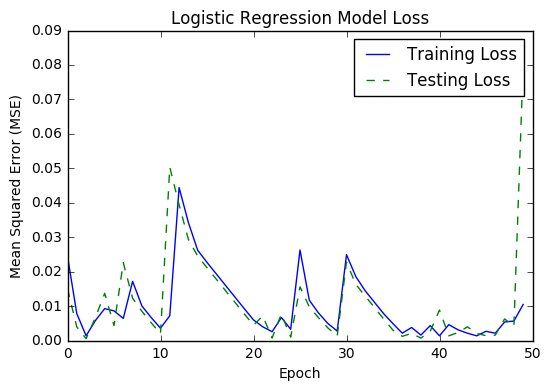

In [25]:
#import keras for training
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

#logistic regression

#Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=1, input_shape=[X_train.shape[1]], 
                activation='sigmoid', W_regularizer=l1(0.01)))
##tanh = 0.999 accuracy

# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Fit the model
history = model.fit(X_train, y_train, batch_size = 256,
          nb_epoch = 50, verbose=1, validation_data=(X_test,y_test))

fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

#classification report
predicted = history.model.predict_classes(X_test)
print 'Logistic Regression Results: \n Accuracy:',accuracy_score(y_test,predicted)
print 'Confusion Matrix:'
print confusion_matrix(y_test,predicted)
print 'Classification Report:'
print classification_report(y_test,predicted)
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()